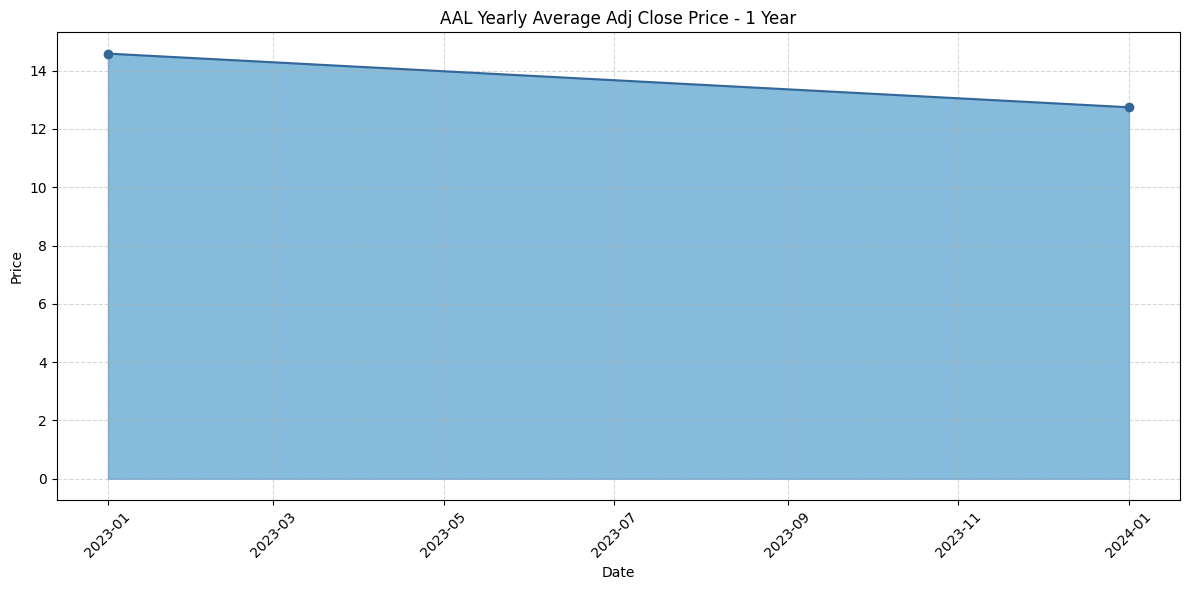

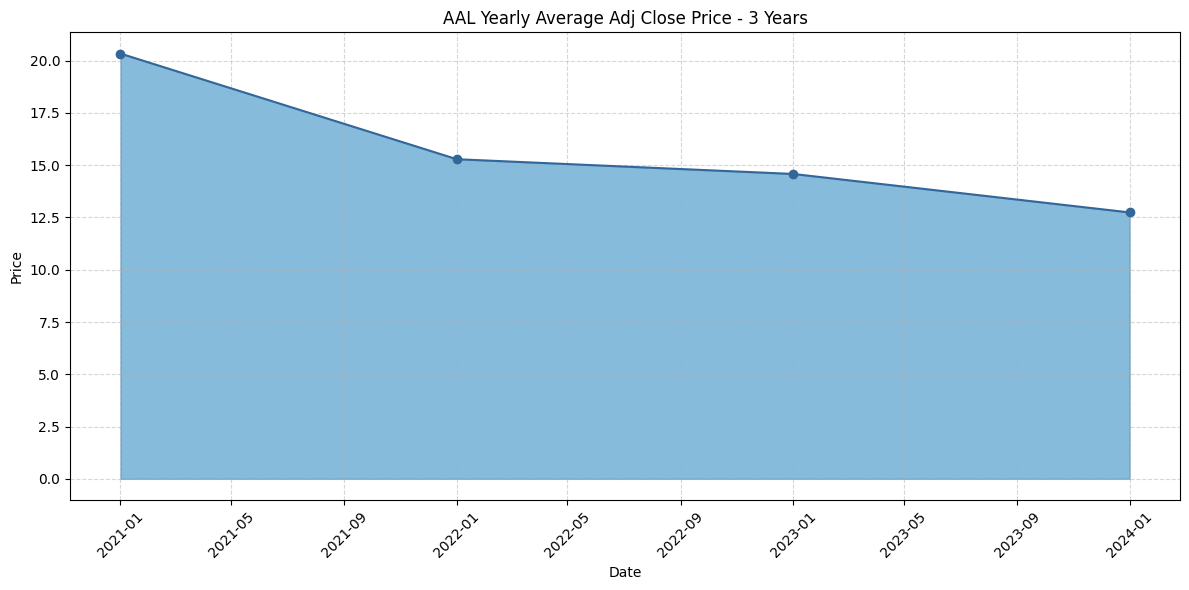

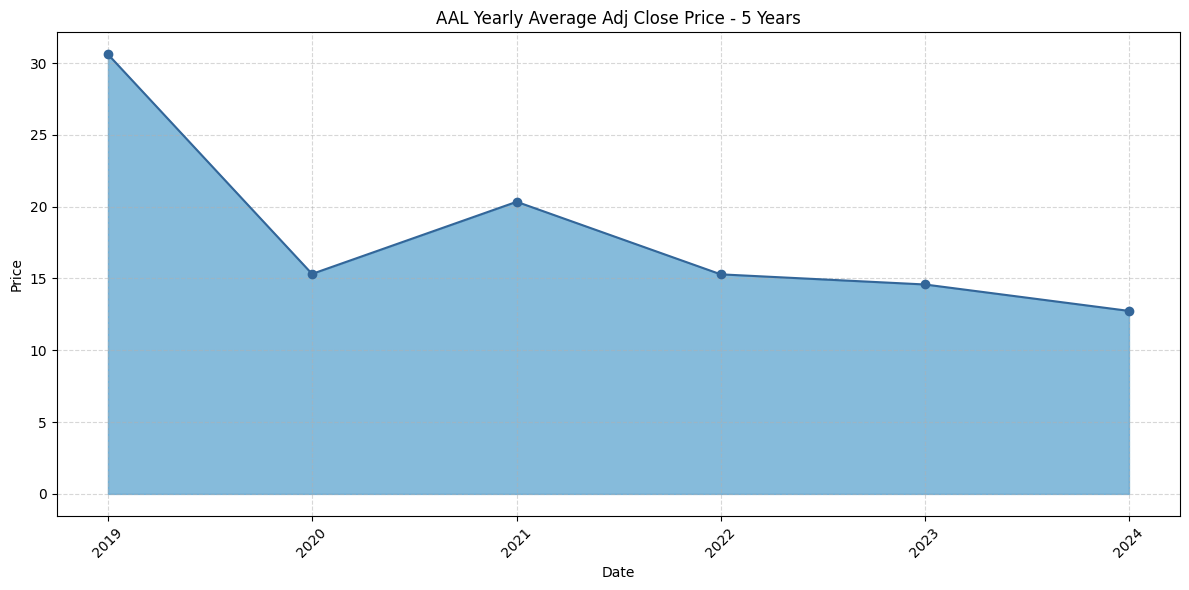

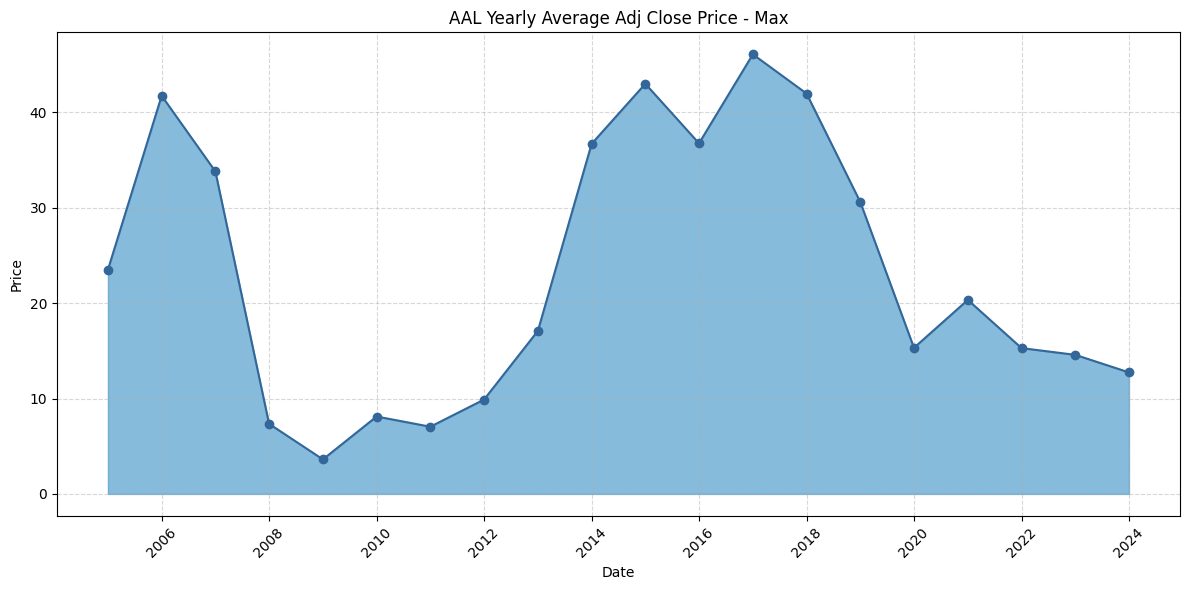

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load dataset
file_path = "Merged_Airlines_With_Revenue.csv"
df = pd.read_csv(file_path)

# Ensure correct format
df['Timeframe_Quarter'] = df['Timeframe_Quarter'].astype(str)
df = df.sort_values('Timeframe_Quarter')

# Filter ALGT
algt_df = df[df['Stock Ticker'] == 'AAL'].copy()

# Extract Year and map it to datetime for plotting
algt_df['Year'] = algt_df['Timeframe_Quarter'].str[:4]
algt_df['Year_Start_Date'] = algt_df['Year'].apply(lambda y: datetime.strptime(f"{y}-01-01", "%Y-%m-%d"))

# Group by year and get average Adj Close
yearly_df = algt_df.groupby(['Year', 'Year_Start_Date'], as_index=False)['Adj Close'].mean()

# Area chart function
def plot_area(data, title, start_year=None):
    subset = data if not start_year else data[data['Year'] >= start_year]
    plt.figure(figsize=(12, 6))
    plt.fill_between(subset['Year_Start_Date'], subset['Adj Close'], color='#539ecd', alpha=0.7)
    plt.plot(subset['Year_Start_Date'], subset['Adj Close'], color='#336699', marker='o')
    plt.title(f'AAL Yearly Average Adj Close Price - {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generate 1Y, 3Y, 5Y, Max area plots
plot_area(yearly_df, '1 Year', start_year='2023')
plot_area(yearly_df, '3 Years', start_year='2021')
plot_area(yearly_df, '5 Years', start_year='2019')
plot_area(yearly_df, 'Max')
